<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Moderna/blob/main/Difracao_Duas_Fendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cm
D = 150.
a = 0.0050
d = 0.0200
slit_positions = [ -d/2, d/2 ]
lambda_red = 632.8 * 1e-07
y_min = -5.
y_max =  5.
draw_slits = True
save_figures = False

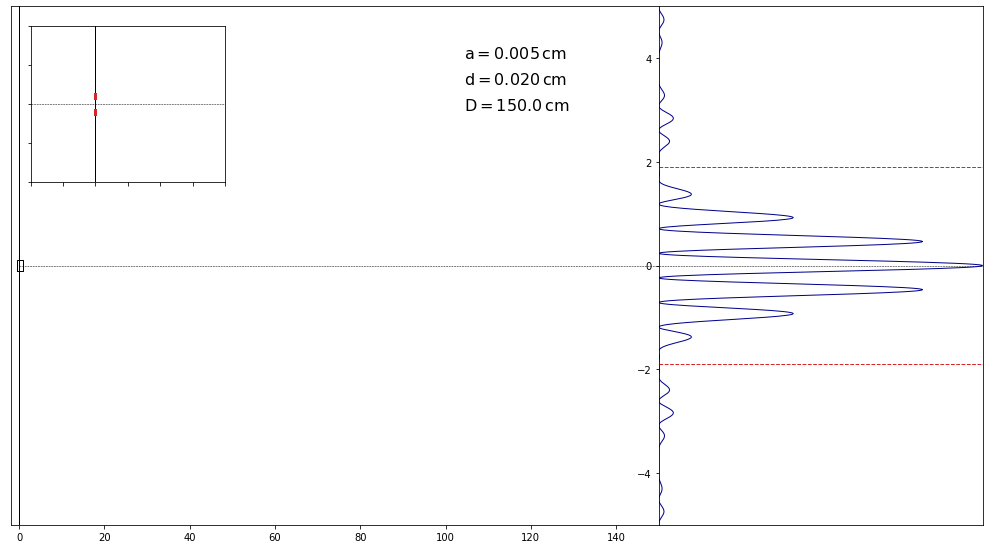

In [3]:
fig = plt.figure( figsize=(1.5*10,8) )
# fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=None, hspace=None)
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax_ = plt.gca()
divider_ = make_axes_locatable( ax_ )
sub_ax_ = divider_.append_axes( "right", size="50%", pad=0. )
ax_.set_xlim( -2., D )
ax_.set_ylim( y_min, y_max )
# ax_.set_xticks( [] )
ax_.set_yticks( [] )
sub_ax_.set_xlim( 0., 1. )
sub_ax_.set_ylim( y_min, y_max )
sub_ax_.set_xticks( [] )
# sub_ax_.set_yticks( [] )

ax_.plot( [0.,D], [0.,0.], 'k', linestyle='dashed', linewidth=0.5 )
ax_.plot( [0.,0.], [y_min,y_max], 'k', linestyle='solid', linewidth=1. )
for pos_ in slit_positions:
    ax_.plot( [0.,0.], [(pos_ - a/2),(pos_ + a/2)], color='tab:red', linewidth=3. )
sub_ax_.plot( [0.,1.], [0.,0.], 'k', linestyle='dashed', linewidth=0.5 )

line_slits = [ None ] * len( slit_positions )
if draw_slits:
    ax_.plot( [-0.5,1.,1.,-0.5,-0.5], [-0.1,-0.1,0.1,0.1,-0.1], 'k-', linewidth=1. )
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    ax_inset_ = inset_axes(ax_, width="30%", height="30%", loc=2, borderpad=2)
    ax_inset_.tick_params(labelleft=False, labelbottom=False)
    ax_inset_.set_xlim( -0.5, 1. )
    ax_inset_.set_ylim( -0.1, 0.1 )
    ax_inset_.plot( [-0.5,1.], [0.,0.], 'k', linestyle='dashed', linewidth=0.5 )
    ax_inset_.plot( [0.,0.], [-0.1,0.1], 'k-', linewidth=1. )
    for idx_, pos_ in enumerate( slit_positions ):
        line_slits[ idx_ ], = ax_inset_.plot( [0.,0.], [(pos_ - a/2),(pos_ + a/2)], color="tab:red", linewidth=3. )

y_pos_ = np.linspace( y_min, y_max, 1000 )
E_over_E0_X_ = 0.
E_over_E0_Y_ = 0.
for pos_ in slit_positions:
    # Secondary spherical waves along slit 
    start__ = ( pos_ - a/2 )
    end__ = ( pos_ + a/2 )
    n__ = 100
    delta_a__ = ( end__ - start__ ) / n__
    source_pos__ = np.linspace( start__, end__, n__ )[:-1] + delta_a__/2
    # print (source_pos__)
    # print (source_pos__.size)
    l_ref__ = D
    size__ = source_pos__.size
    for pos__ in source_pos__:
        l__ = np.sqrt( ( y_pos_ - pos__ ) ** 2 + D ** 2 )
        phi__ = 2 * np.pi * ( l__ - l_ref__ ) / lambda_red
        E_over_E0_X_ += np.cos( phi__ ) / size__
        E_over_E0_Y_ += np.sin( phi__ ) / size__

I_over_I0_ = ( E_over_E0_X_ ** 2 + E_over_E0_Y_ ** 2 ) / ( len( slit_positions ) ** 2 )

line_plot, = sub_ax_.plot( I_over_I0_, y_pos_, color='darkblue', linestyle='solid', linewidth=1 )

y_minima_ = D * ( lambda_red / a ) / np.sqrt( 1. - ( lambda_red / a ) ** 2 )
line_max_0, = sub_ax_.plot( [0.,1.], [y_minima_,y_minima_], color='tab:red', linestyle='dashed', linewidth=1 )
line_max_1, = sub_ax_.plot( [0.,1.], [-y_minima_,-y_minima_], color='tab:red', linestyle='dashed', linewidth=1 )
text_a = ax_.text( 0.70, 0.90, r'$\rm{{a}} = {:.3f}\,\rm{{cm}}$'.format( a ), transform=ax_.transAxes, fontsize=16 )
d_ = ( slit_positions[1] - slit_positions[0] )
text_d = ax_.text( 0.70, 0.85, r'$\rm{{d}} = {:.3f}\,\rm{{cm}}$'.format( d_ ), transform=ax_.transAxes, fontsize=16 )
text_D = ax_.text( 0.70, 0.80, r'$\rm{{D}} = {:.1f}\,\rm{{cm}}$'.format( D ), transform=ax_.transAxes, fontsize=16 )
if save_figures:
    label_ = "fig_Difracao_Duas_Fendas_{:.4f}_{:.4f}".format( a, d_ )
    # print ( label_ )
    plt.savefig( label_ + ".pdf", bbox_inches='tight' )
    plt.savefig( label_ + ".png", bbox_inches='tight' )

In [4]:
import os
os.listdir()

['.config', 'sample_data']

In [5]:
# !zip figs_Difracao_Duas_Fendas.zip fig_Difracao_Duas_Fendas*
# from google.colab import files
# files.download( "figs_Difracao_Duas_Fendas.zip" )